In [4]:

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import pandas as pd

## 1B

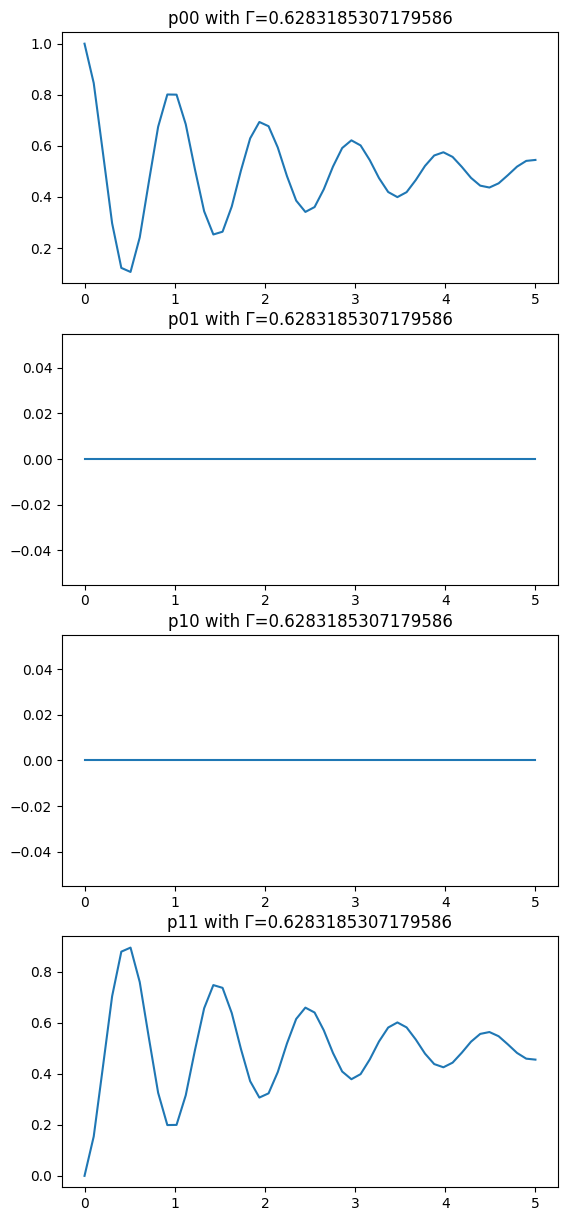

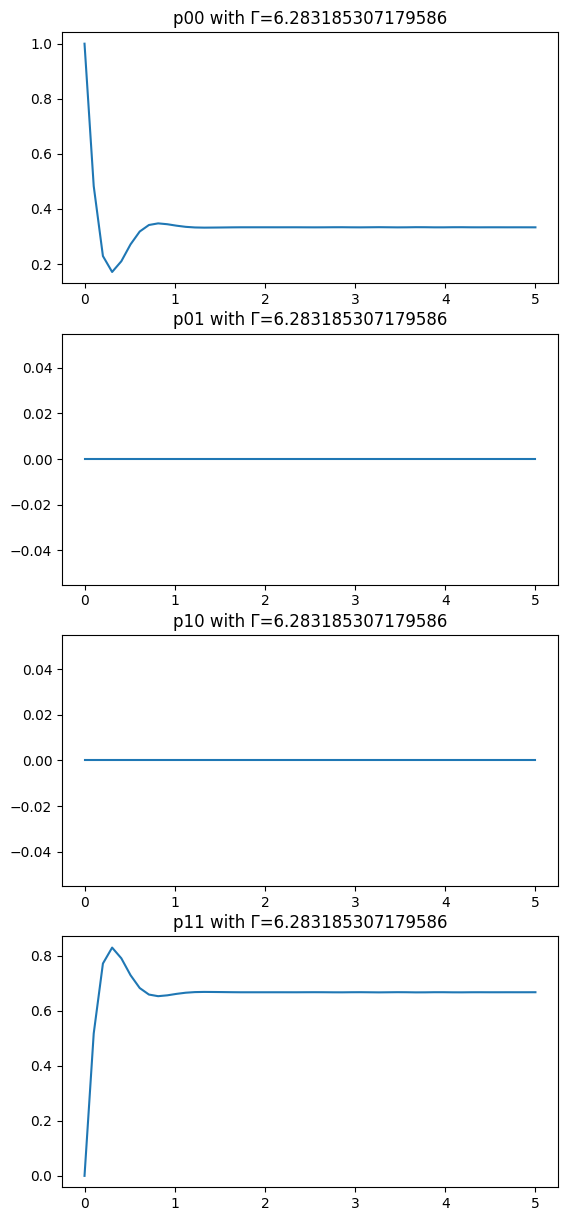

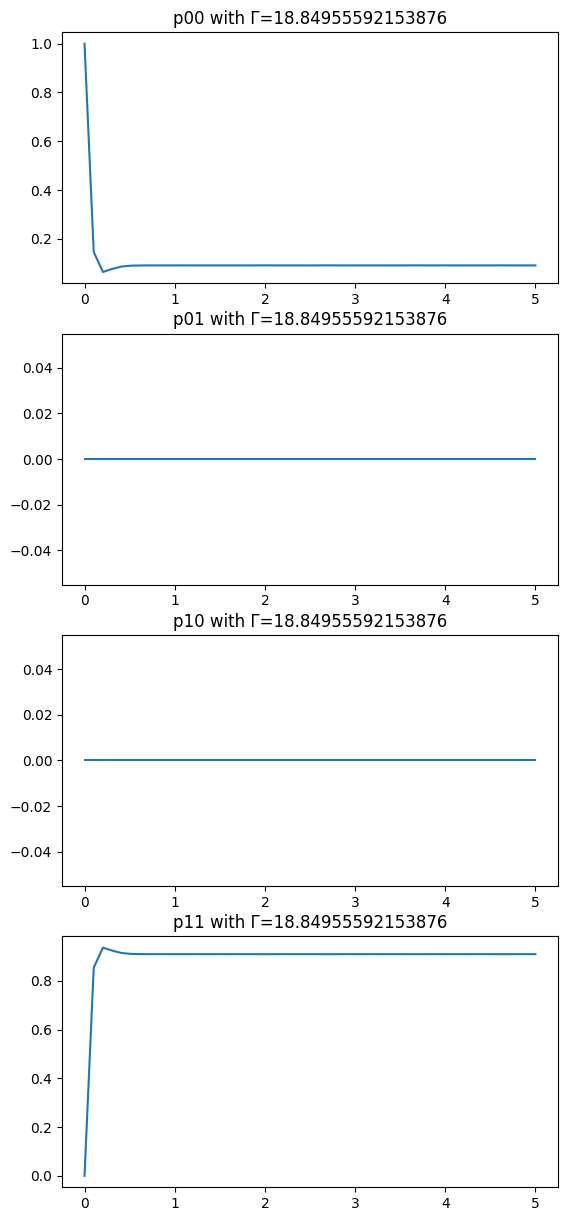

In [21]:
delta = 0
Omega = 2*np.pi


def OBE_diffeq(t, p, Gamma):
    p00 = p[0]
    p01 = p[1]
    p10 = p[2]
    p11 = p[3]

    p00_dt = (-1.j * Omega/2) * (p10 - p01) - Gamma*p00
    p01_dt = (1.j * delta * p01) - (1.j * Omega/2) * (p11 - p00) - (Gamma/2)*p01
    p10_dt = (-1.j * delta * p10) - (1.j * Omega/2) * (p00 - p11) - (Gamma/2)*p10
    p11_dt = (-1.j * Omega/2) * (p01 - p10) + Gamma*p00

    return [p00_dt, p01_dt, p10_dt, p11_dt]

def plot_OBE_sol(t, sol, Gamma):
    fig, axs = plt.subplots(4)
    fig.set_figheight(15)

    for i in range(4):
        p_str = "{0:02b}".format(i)

        axs[i].set_title("p{} with Γ={}".format(p_str,Gamma))
        axs[i].plot(t, sol[i])
        plt.subplots_adjust(hspace=None)

t0 = 0
tf = 5

t = np.linspace(t0, tf)
gammas = [0.1*Omega, Omega, 3*Omega]

for Gamma in gammas:
    sol = solve_ivp(OBE_diffeq, [t0, tf], [1 + 0.j,0 + 0.j,0 + 0.j,0 + 0.j], args=(Gamma,), t_eval=t, dense_output=True)
    plot_OBE_sol(t, sol.y, Gamma)


## 1D

              0     1
0   3701.396844  6692
1   3710.441814  6810
2   3720.869837  6738
3   3730.021237  6675
4   3740.219984  6979
..          ...   ...
74  4430.082269  6782
75  4440.413206  6590
76  4450.787269  6730
77  4459.644649  6844
78  4470.698998  6625

[79 rows x 2 columns]


<AxesSubplot: xlabel='0'>

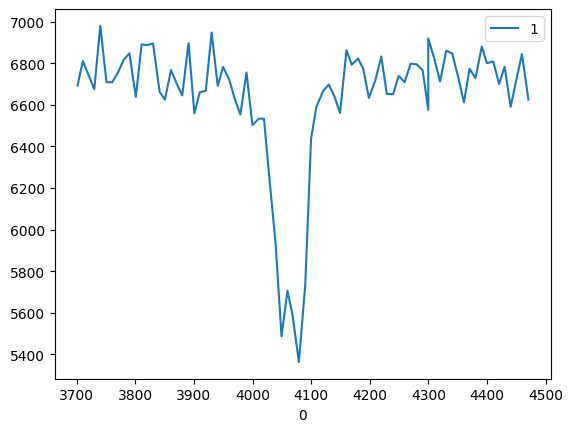

In [5]:
Ba133_SR_data = pd.read_csv('Ba133_SRdata.txt',sep="\t", header=None)
print(Ba133_SR_data)

Ba133_D = Ba133_SR_data[0]
Ba133_R = Ba133_SR_data[1]
Ba133_SR_data.plot(0,1)

In [6]:
shift_D_val_index = list(Ba133_R).index(min(Ba133_R))
shift_D_val = Ba133_D[shift_D_val_index]
print("Shifted delta/gamma = {}".format(shift_D_val))


shift_R_val_index = list(Ba133_R).index(np.median(Ba133_R))
shift_R_val = Ba133_R[shift_R_val_index]
print("Shifted R value = {}".format(shift_R_val))


Shifted delta/gamma = 4079.092019
Shifted R value = 6709


Estimated s = 33.161595343792264
Estimated gamma = 9.62511555060512
4065.5579325246126
6785.8263441508025


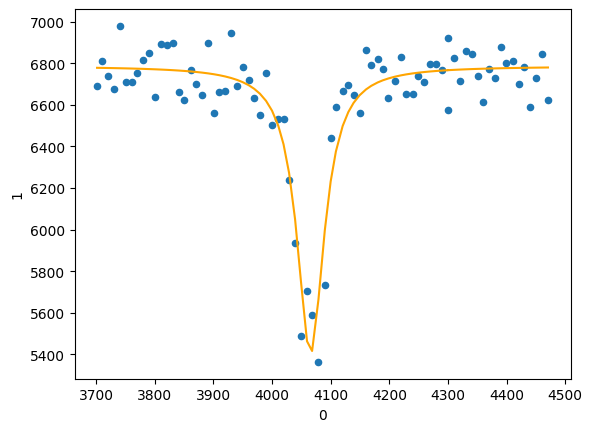

In [16]:
def scatter_rate(delta, s, gamma, gamma_prime, shift_D_val, shift_R_val):
    return (-(gamma_prime/2) * (s / (1 + s + 4*((delta - shift_D_val)/gamma )**2))) + shift_R_val

guess = [10, 20, 50, shift_D_val, shift_R_val]
fit, covarrance = curve_fit(scatter_rate, Ba133_D, Ba133_R, p0=guess, maxfev=10000)
estimated_s, estimated_gamma, estimated_gamma_prime ,shift_d, shift_r = fit
print("Estimated s = {}".format(estimated_s))
print("Estimated gamma = {}".format(estimated_gamma))
print(shift_d)
print(shift_r)

Ba133_SR_data.plot(0,1, kind="scatter")
plt.plot(Ba133_D, scatter_rate(Ba133_D, estimated_s, estimated_gamma, estimated_gamma_prime, shift_d, shift_r), color="orange")


The resulting fit is a bit rough, but it appears that the spontaneous rate of emission equation begins to look more like a spiked gaussian 

## 2A

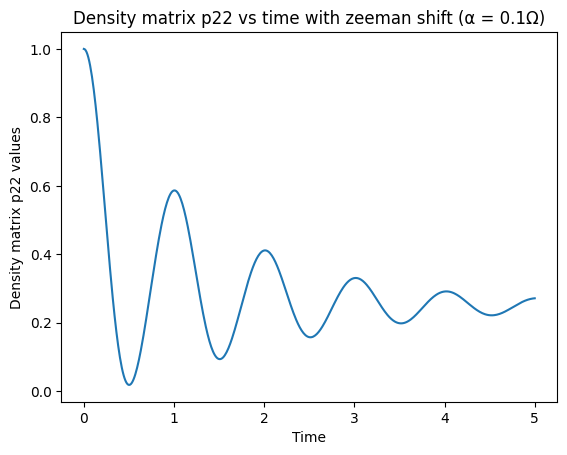

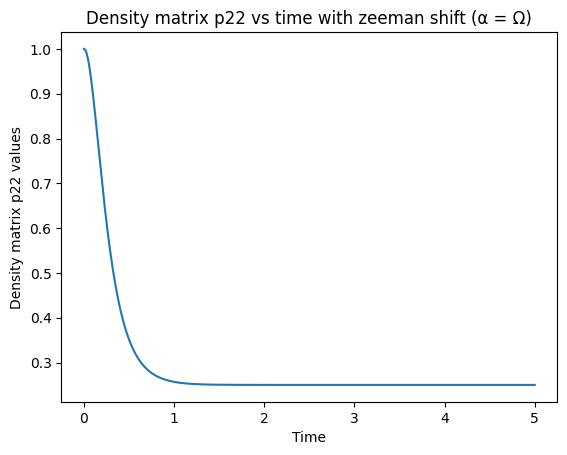

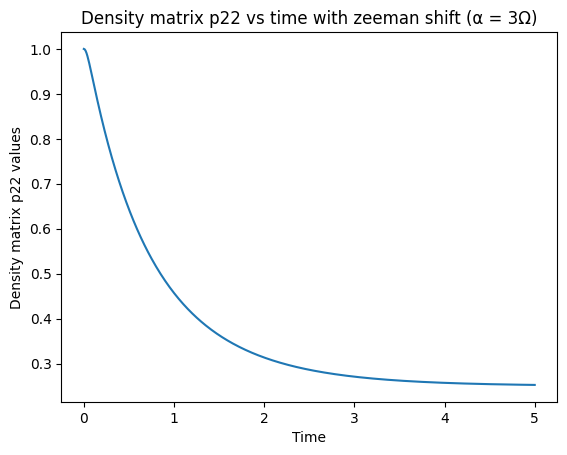

In [96]:
h_bar = 1
delta = 0
Omega = 2*np.pi

H = -delta/2 * sigmaz() + Omega / 2 * sigmax()
psi0 = fock(2,1)
rho0 = ket2dm(psi0)
tlist = np.linspace(0,5,500)

def plot_zeeman_shift_decoherence(alpha, alpha_str):
    c_zs = np.sqrt(h_bar * alpha) * sigmaz()
    res = mesolve(H, rho0, tlist, c_ops=c_zs)
    p22_vals = [np.abs((state * state.dag())[1,1]) for state in res.states]
    
    plt.title("Density matrix p22 vs time with zeeman shift (α = {})".format(alpha_str))
    plt.xlabel("Time")
    plt.ylabel("Density matrix p22 values")
    plt.plot(tlist, p22_vals)
    plt.show()

plot_zeeman_shift_decoherence(0.1*Omega, "0.1Ω")
plot_zeeman_shift_decoherence(Omega, "Ω")
plot_zeeman_shift_decoherence(3*Omega, "3Ω")

## 2B

10.0%. Run time:   0.14s. Est. time left: 00:00:00:01
20.0%. Run time:   0.17s. Est. time left: 00:00:00:00
30.0%. Run time:   0.18s. Est. time left: 00:00:00:00
40.0%. Run time:   0.24s. Est. time left: 00:00:00:00
50.0%. Run time:   0.25s. Est. time left: 00:00:00:00
60.0%. Run time:   0.28s. Est. time left: 00:00:00:00
70.0%. Run time:   0.31s. Est. time left: 00:00:00:00
80.0%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
100.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.42s


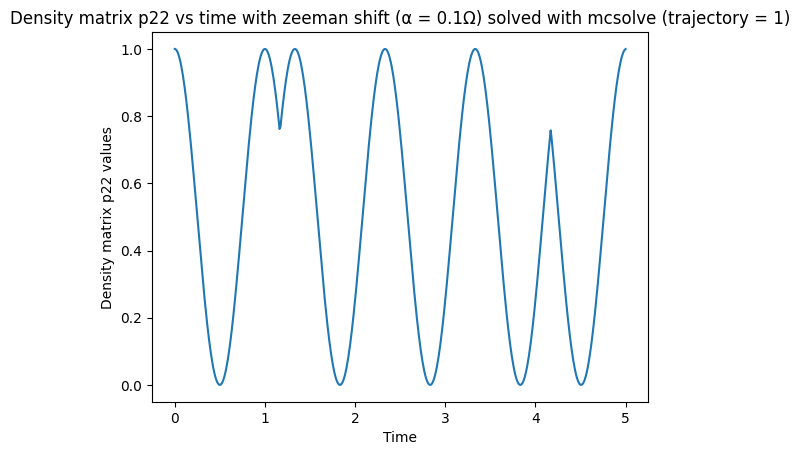

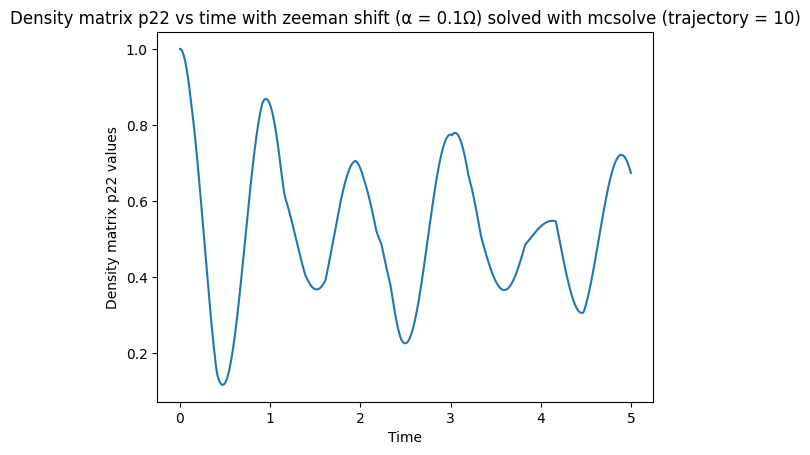

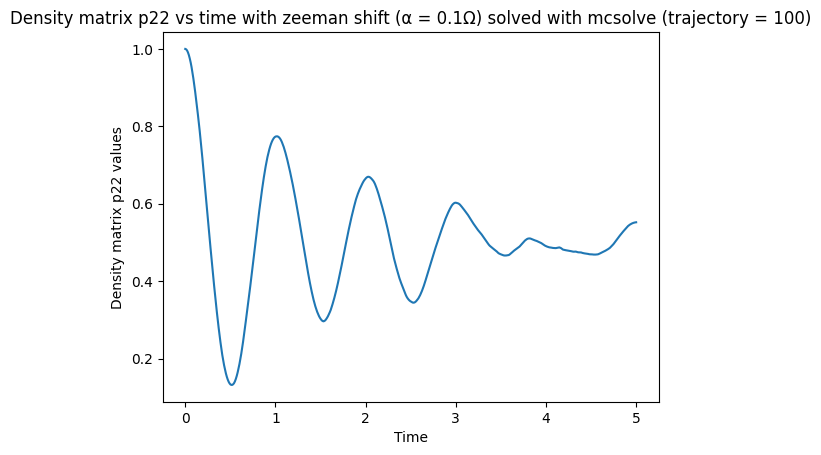

10.0%. Run time:   0.19s. Est. time left: 00:00:00:01
20.0%. Run time:   0.23s. Est. time left: 00:00:00:00
30.0%. Run time:   0.25s. Est. time left: 00:00:00:00
40.0%. Run time:   0.30s. Est. time left: 00:00:00:00
50.0%. Run time:   0.33s. Est. time left: 00:00:00:00
60.0%. Run time:   0.38s. Est. time left: 00:00:00:00
70.0%. Run time:   0.41s. Est. time left: 00:00:00:00
80.0%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
100.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.54s


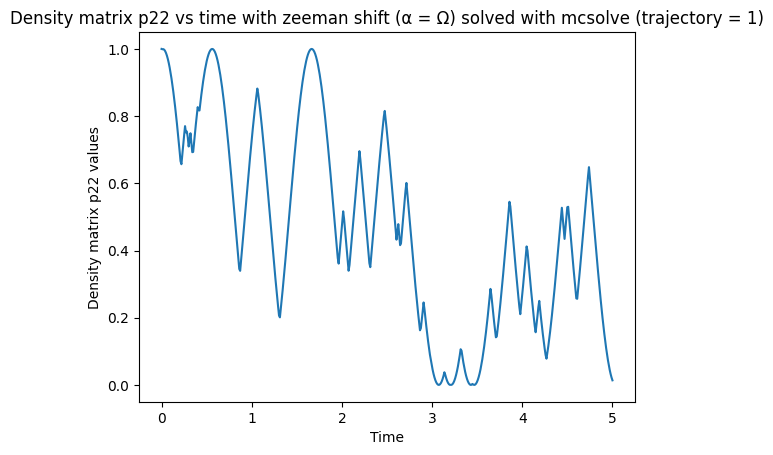

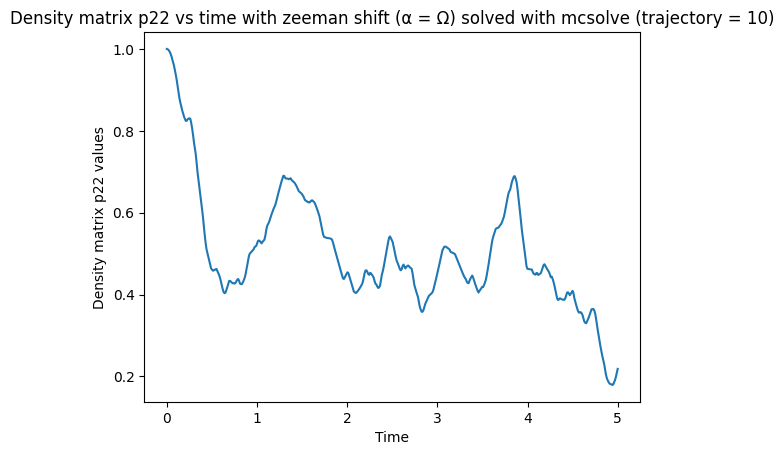

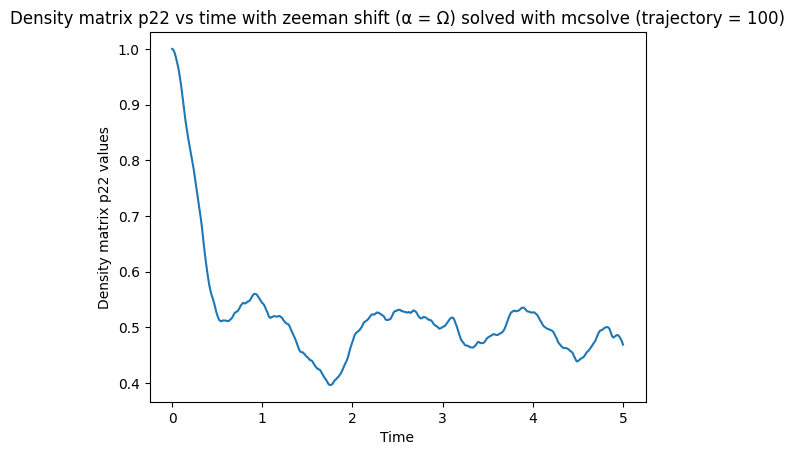

10.0%. Run time:   0.23s. Est. time left: 00:00:00:02
20.0%. Run time:   0.33s. Est. time left: 00:00:00:01
30.0%. Run time:   0.41s. Est. time left: 00:00:00:00
40.0%. Run time:   0.46s. Est. time left: 00:00:00:00
50.0%. Run time:   0.53s. Est. time left: 00:00:00:00
60.0%. Run time:   0.60s. Est. time left: 00:00:00:00
70.0%. Run time:   0.67s. Est. time left: 00:00:00:00
80.0%. Run time:   0.76s. Est. time left: 00:00:00:00
90.0%. Run time:   0.83s. Est. time left: 00:00:00:00
100.0%. Run time:   0.87s. Est. time left: 00:00:00:00
Total run time:   0.90s


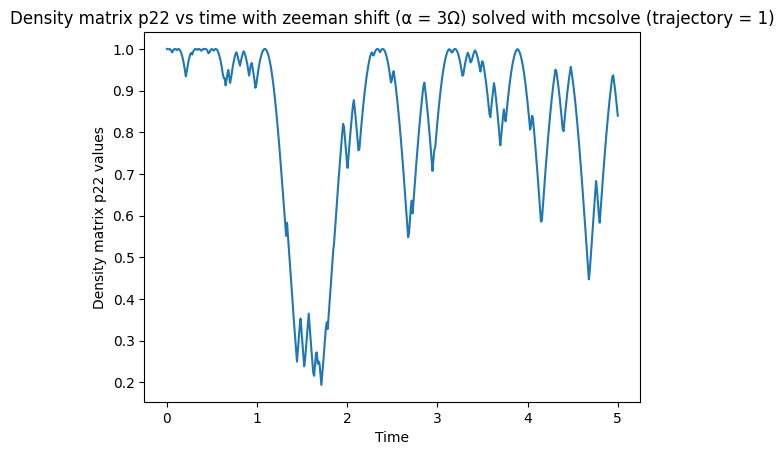

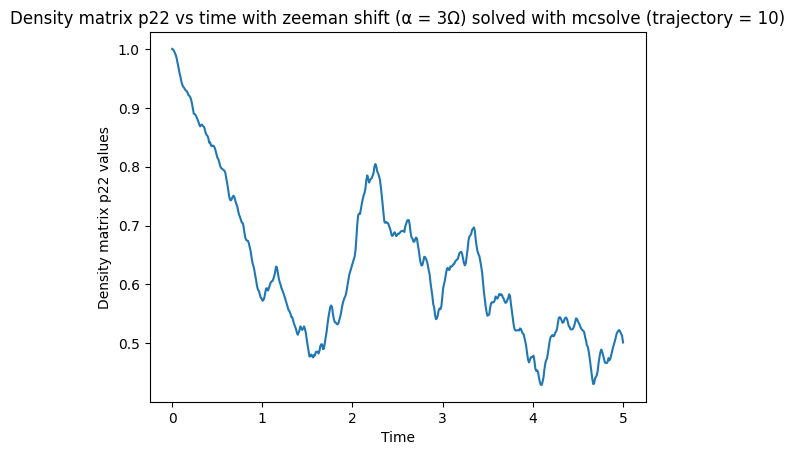

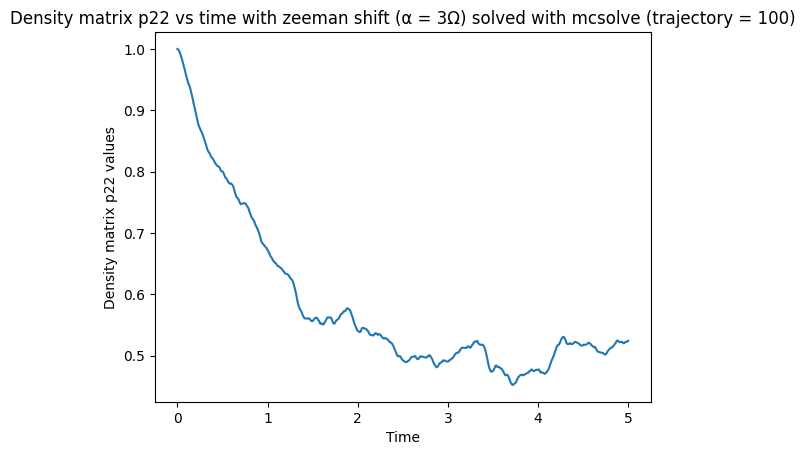

In [99]:
def plot_zeeman_shift_decoherence_mcsolve(alpha, alpha_str):
    c_zs = np.sqrt(h_bar * alpha) * sigmaz()
    e_11 = ket2dm(fock(2,1))
    ntraj = [1, 10, 100]

    res = mcsolve(H, psi0, tlist, c_ops=c_zs, e_ops=e_11, ntraj=ntraj)

    count = 0
    for traj in ntraj:
        plt.title("Density matrix p22 vs time with zeeman shift (α = {}) solved with mcsolve (trajectory = {})".format(alpha_str, traj))
        plt.xlabel("Time")
        plt.ylabel("Density matrix p22 values")
        plt.plot(tlist, res.expect[count][0])
        plt.show()

        count+=1

plot_zeeman_shift_decoherence_mcsolve(0.1*Omega, "0.1Ω")
plot_zeeman_shift_decoherence_mcsolve(Omega, "Ω")
plot_zeeman_shift_decoherence_mcsolve(3*Omega, "3Ω")